In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.Introduction & Problem Statement

**Dataset Columns Description**

| Column                  | Description                                  |
|-------------------------|----------------------------------------------|
| **loan_id**             | Unique loan application ID (not for training) |
| **no_of_dependents**    | Number of dependents of the applicant         |
| **education**           | Applicant's education level                   |
| **self_employed**       | Whether the applicant is self-employed (Y/N)  |
| **income_annum**        | Applicant's annual income                     |
| **loan_amount**         | Requested loan amount                         |
| **loan_term**           | Loan repayment period (months)                |
| **cibil_score**         | Applicant's credit score                      |
| **residential_assets_value** | Value of residential property            |
| **commercial_assets_value**  | Value of commercial property             |
| **luxury_assets_value**      | Value of luxury assets (car, jewelry)    |
| **bank_asset_value**    | Value of bank savings/deposits                |
| **loan_status**         | Target column (Approved/Rejected)             |
**bold text**

### 2.Dataset Overview

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [8]:
# the columns names starts with space so we want to rename it \
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

In [9]:
catigorical_cols = [col for col in df.columns if df[col].dtype == 'O']
for col in catigorical_cols:
    print(f'{col} : {df[col].unique()}')

education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']


In [10]:
for col in catigorical_cols:
  print(df[col].value_counts()/len(df)*100)
  print()

education
Graduate        50.222535
Not Graduate    49.777465
Name: count, dtype: float64

self_employed
Yes    50.363083
No     49.636917
Name: count, dtype: float64

loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64



**Data Balance Check**

- **Education:** The distribution between **Graduate (50.2%)** and **Not Graduate (49.8%)** is almost equal.  
- **Self Employed:** The split between **Yes (50.4%)** and **No (49.6%)** is also balanced.  
- **Loan Status (Target Variable):** Although **Approved (62.2%)** is slightly higher than **Rejected (37.8%)**, the dataset is not heavily imbalanced so you can try it if the data Biased you can try **class weighting** , **SMOTE**.


### 3.Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

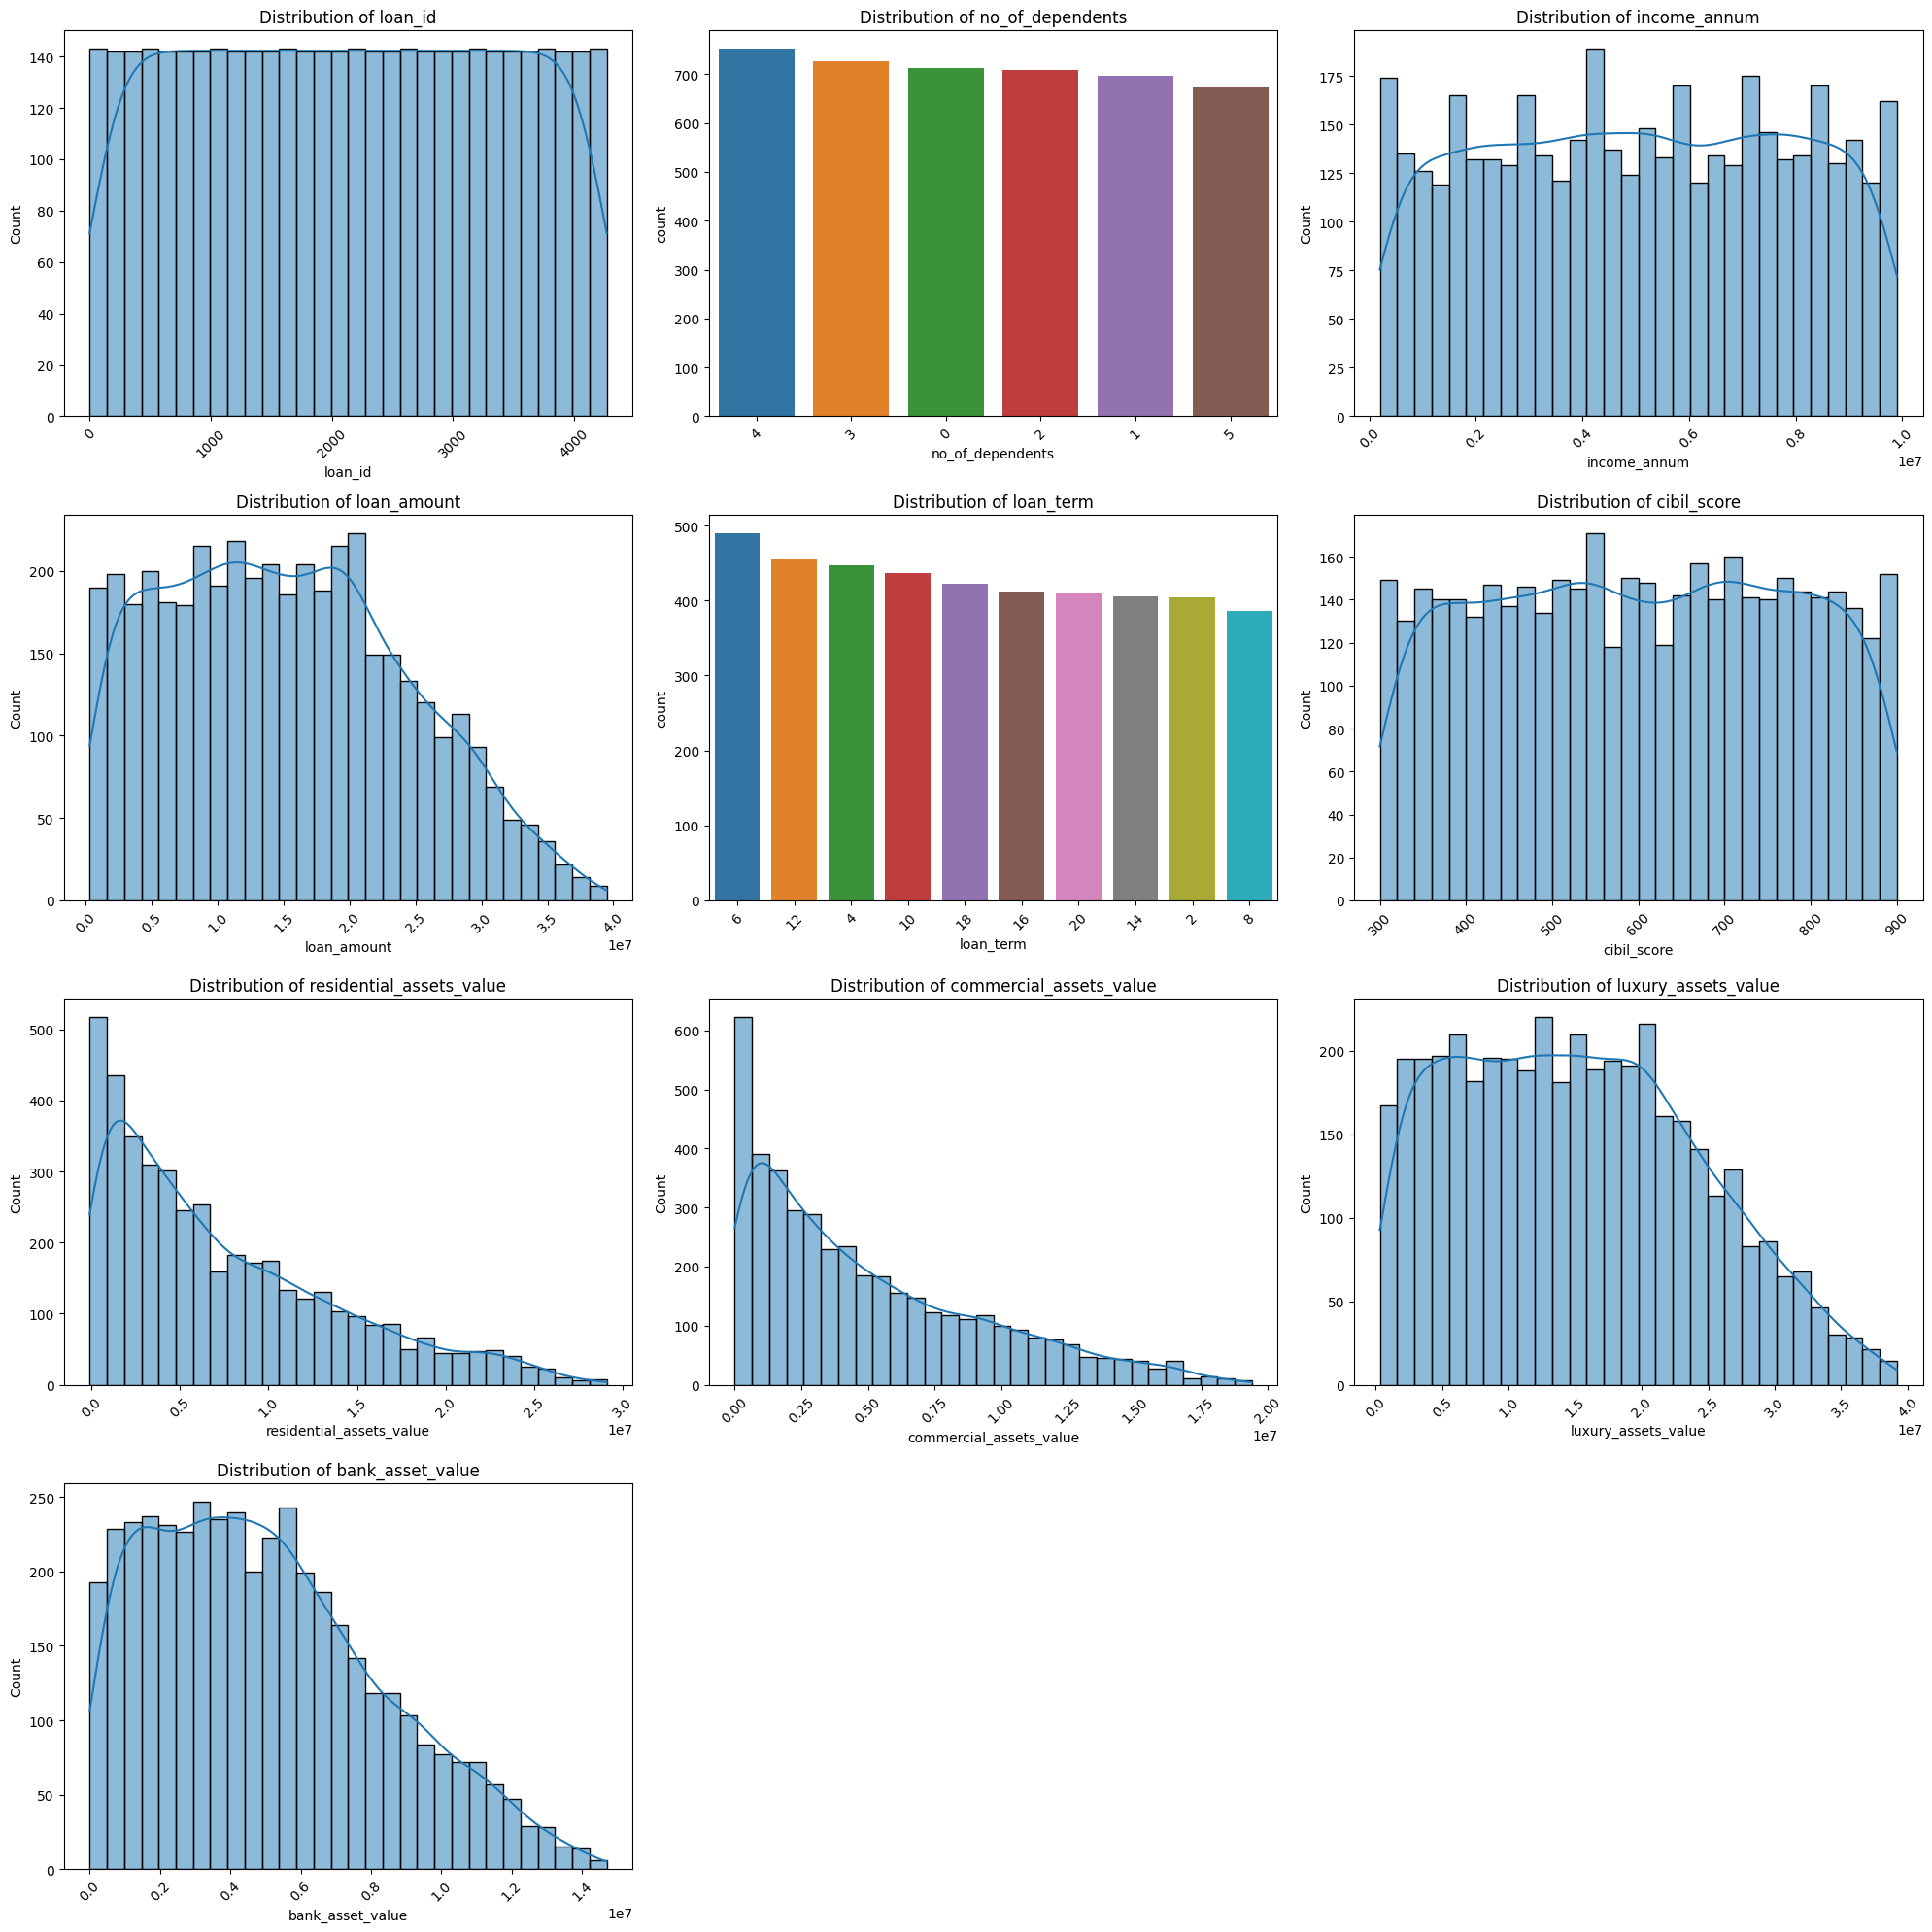

In [11]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(numeric_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(numeric_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

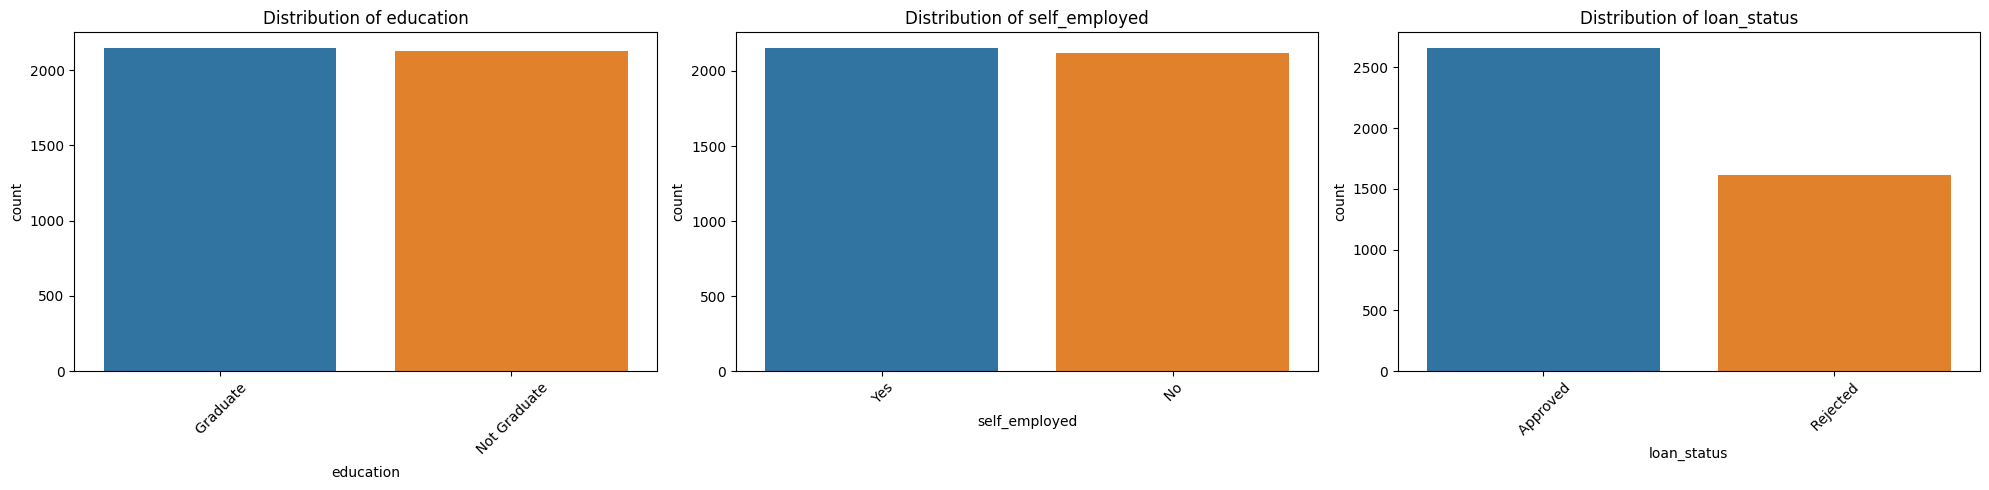

In [12]:
object_cols = df.select_dtypes(include="object").columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(object_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(object_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
df.columns.tolist()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

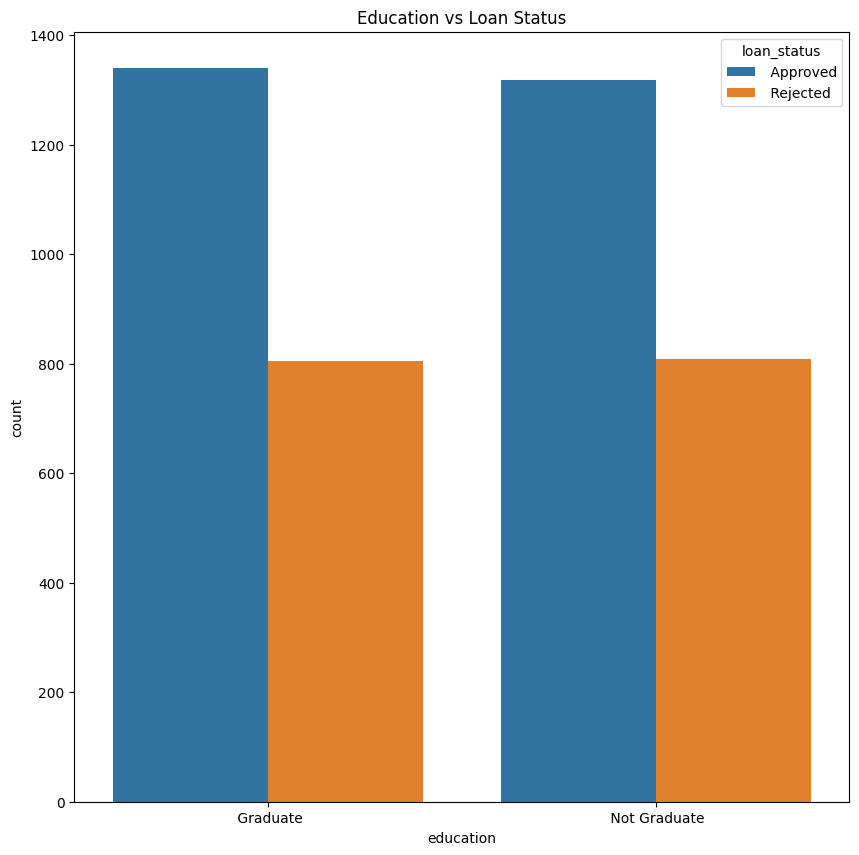

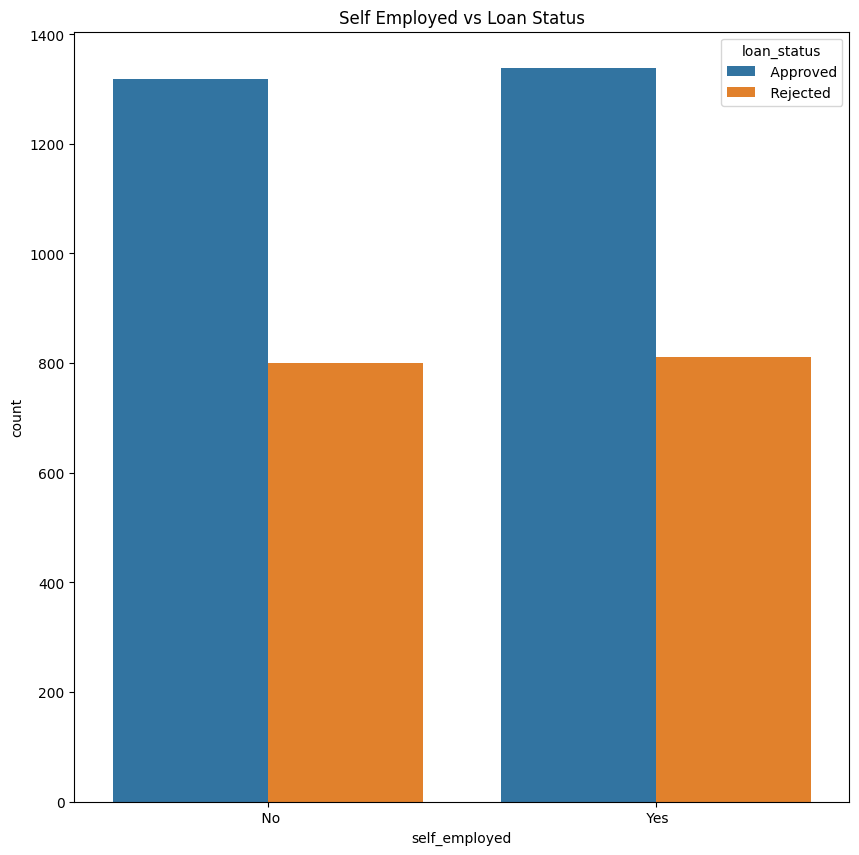

loan_status    Approved   Rejected
education                         
Graduate      62.453358  37.546642
Not Graduate  61.976471  38.023529


In [14]:
# 1. Categorical vs Target
plt.figure(figsize=(10,10))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()

# Crosstab for percentages
edu_loan = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
print(edu_loan)


<Axes: xlabel='no_of_dependents', ylabel='count'>

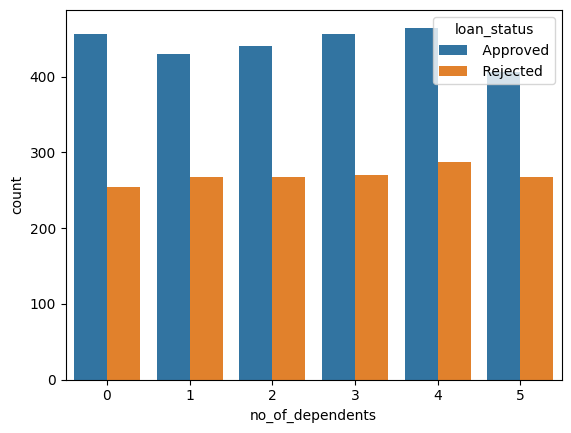

In [15]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status')

### 4. Data Preprocessing¶

In [16]:
df.drop(columns=['loan_id'],axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catigorical_cols:
  df[col] = le.fit_transform(df[col])


<Axes: >

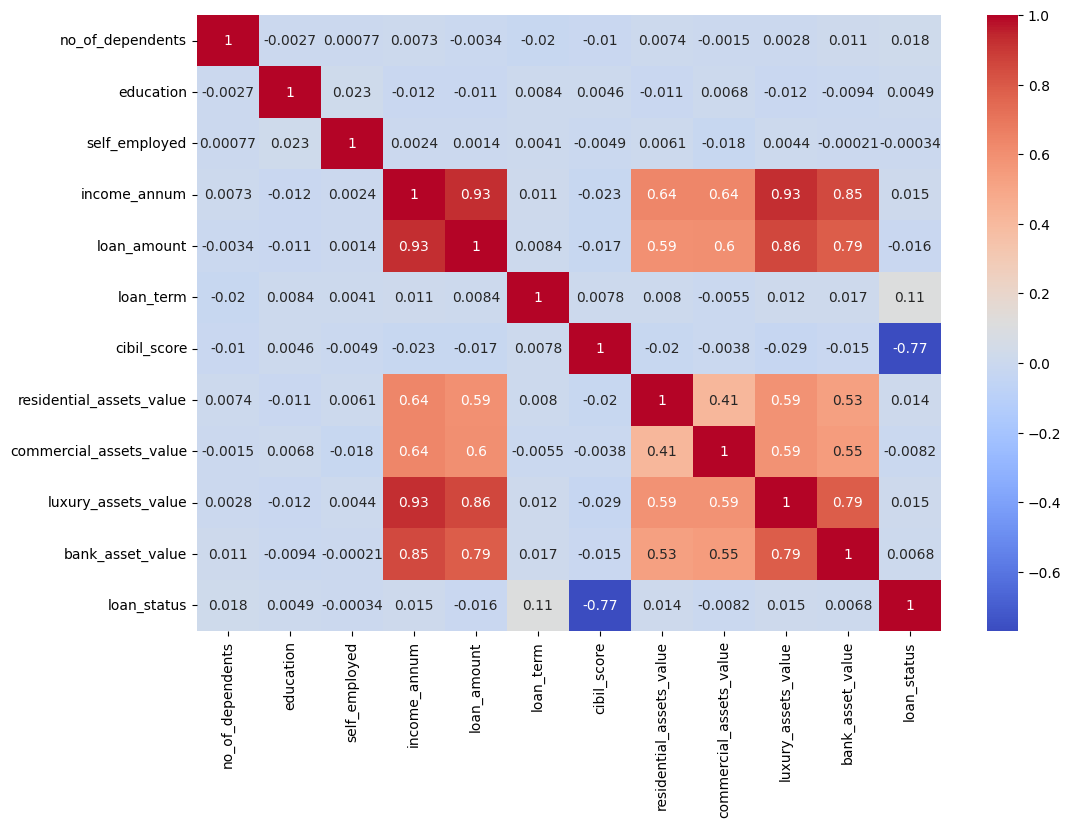

In [18]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
# Example: Debt-to-Income Ratio
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df= df.drop(columns=['loan_amount','income_annum'])

**Feature Engineering: Debt-to-Income Ratio**

We created a new feature `debt_to_income` by dividing the `loan_amount` by the `income_annum`. This new feature provides a more meaningful representation of the applicant's financial burden compared to using the raw `loan_amount` and `income_annum` separately.


<Axes: >

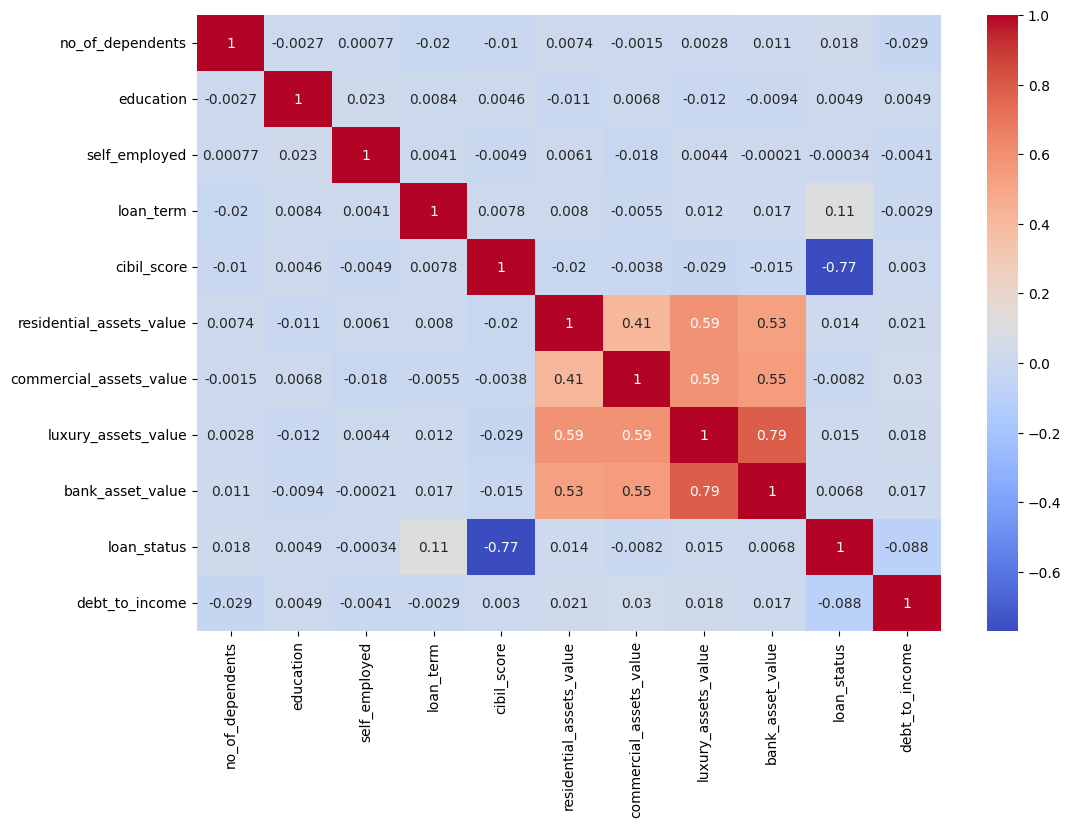

In [20]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income
0,0.4,0.0,0.0,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0,0.645833
1,0.0,1.0,1.0,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0,0.590244
2,0.6,0.0,0.0,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0,0.705495
3,0.6,0.0,0.0,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0,0.897561
4,1.0,1.0,1.0,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0,0.387755


In [22]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Model Selection & Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
# Cross-validation on training data
log_model = LogisticRegression(max_iter=1000)

# Train model on full training data
log_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_log = log_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_log))

Test Accuracy: 0.8992974238875878


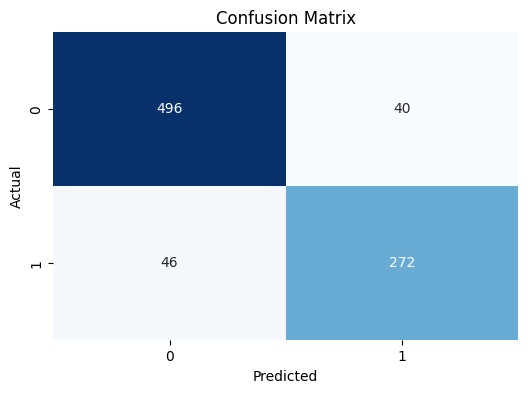

In [26]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
classification_report = classification_report(y_test, y_pred_log)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       536
         1.0       0.87      0.86      0.86       318

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



In [28]:
# Cross-validation on training data
DTC_model = DecisionTreeClassifier()


# Train model on full training data
DTC_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_DTC = DTC_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_DTC))

Test Accuracy: 0.9953161592505855


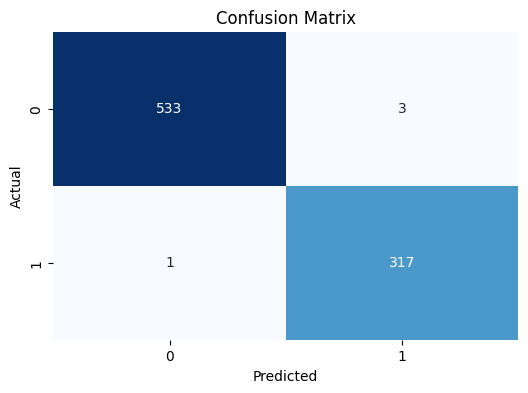

In [29]:
cm = confusion_matrix(y_test, y_pred_DTC)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       536
         1.0       0.99      1.00      0.99       318

    accuracy                           1.00       854
   macro avg       0.99      1.00      0.99       854
weighted avg       1.00      1.00      1.00       854



In [31]:
# Cross-validation on training data
rf_model = RandomForestClassifier()


# Train model on full training data
rf_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_rf = rf_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Test Accuracy: 0.9988290398126464


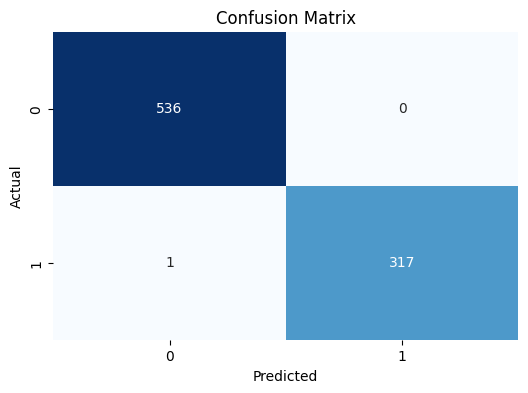

In [32]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
classification_report = classification_report(y_test, y_pred_rf)
print(classification_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [34]:
# Cross-validation on training data
KN_model = KNeighborsClassifier()

# Train model on full training data
KN_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_KN = KN_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_KN))

Test Accuracy: 0.9192037470725996


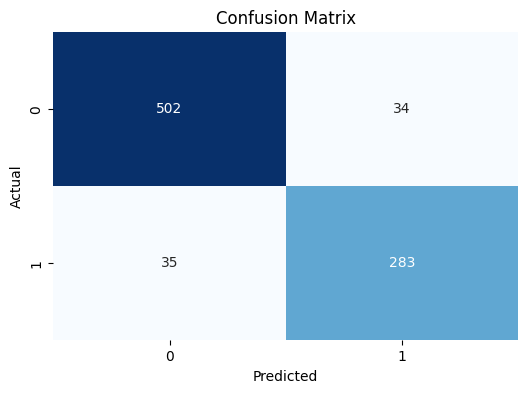

In [35]:
cm = confusion_matrix(y_test, y_pred_KN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KN))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       536
         1.0       0.89      0.89      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [37]:
from sklearn.inspection import permutation_importance
results = permutation_importance(
    KN_model, 
    X_train, 
    y_train, 
    n_repeats=10,  # Number of shuffles
    random_state=42
)

In [38]:
# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

DTC_importances = pd.Series(DTC_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

log_importances = pd.Series(
    log_model.coef_[0],  # Get coefficients (1D array)
    index=X_train.columns  # Match feature names
).abs().sort_values(ascending=False)  # Sort by importance (absolute value)


KN_importances = pd.Series(
    results.importances_mean,  # Mean importance across repeats
    index=X_train.columns
).sort_values(ascending=False)

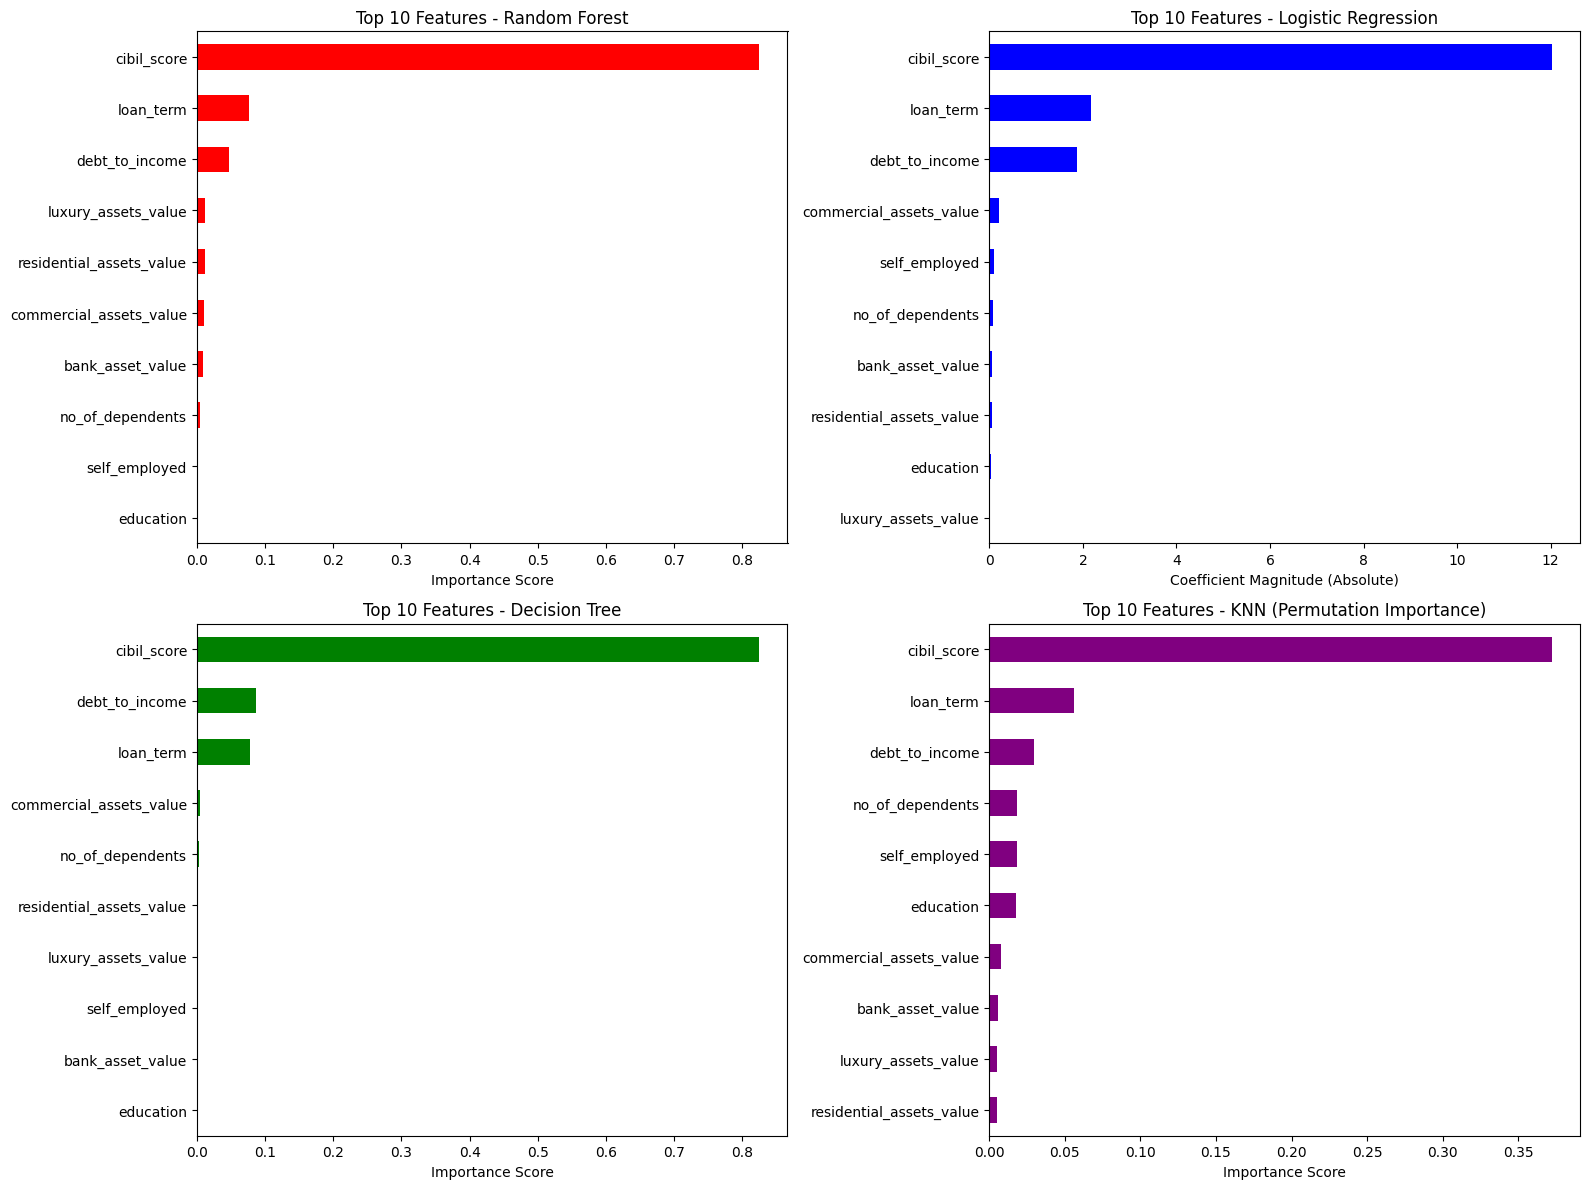

In [39]:
import matplotlib.pyplot as plt

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Plot 1: Random Forest ---
rf_importances.head(10).sort_values().plot(
    kind='barh', 
    color='red', 
    ax=axes[0, 0]  # First row, first column
)
axes[0, 0].set_title("Top 10 Features - Random Forest")
axes[0, 0].set_xlabel("Importance Score")

# --- Plot 2: Logistic Regression ---
log_importances.head(10).sort_values().plot(
    kind='barh', 
    color='blue', 
    ax=axes[0, 1]  # First row, second column
)
axes[0, 1].set_title("Top 10 Features - Logistic Regression")
axes[0, 1].set_xlabel("Coefficient Magnitude (Absolute)")

# --- Plot 3: Decision Tree ---
DTC_importances.head(10).sort_values().plot(
    kind='barh', 
    color='green', 
    ax=axes[1, 0]  # Second row, first column
)
axes[1, 0].set_title("Top 10 Features - Decision Tree")
axes[1, 0].set_xlabel("Importance Score")

# --- Plot 4: KNN  ---
KN_importances.head(10).sort_values().plot(
    kind='barh', 
    color='purple', 
    ax=axes[1, 1]  # Second row, second column
)
axes[1, 1].set_title("Top 10 Features - KNN (Permutation Importance)")
axes[1, 1].set_xlabel("Importance Score")


plt.tight_layout()
plt.show()

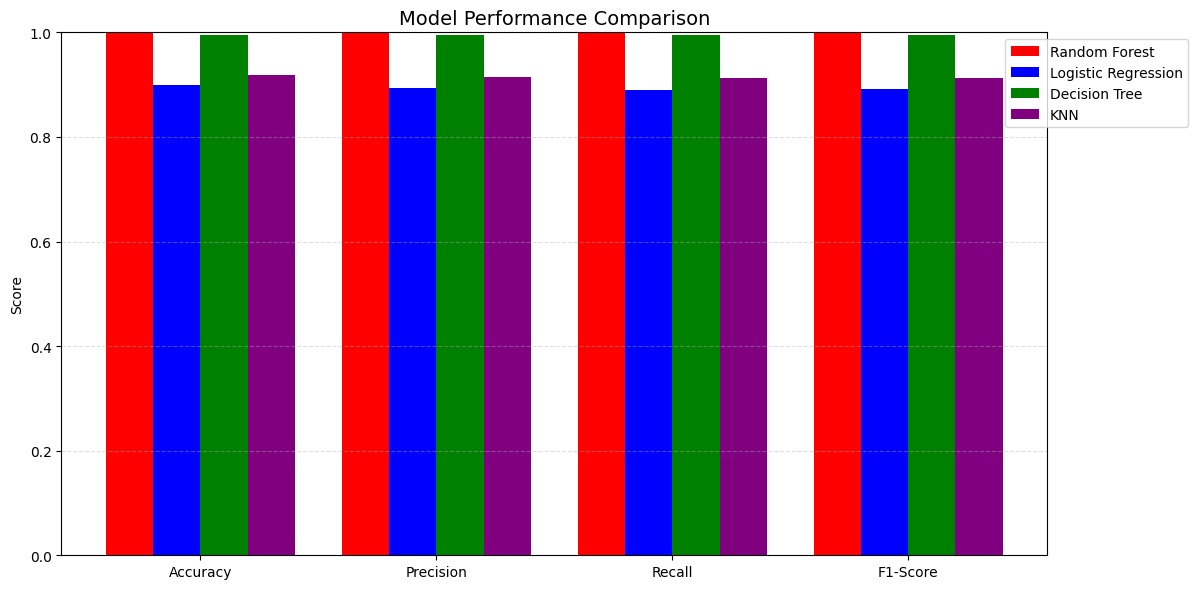

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
metrics_rf = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

metrics_log = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log, average='macro'),
    recall_score(y_test, y_pred_log, average='macro'),
    f1_score(y_test, y_pred_log, average='macro')
]

metrics_DTC = [
        accuracy_score(y_test, y_pred_DTC),
    precision_score(y_test, y_pred_DTC, average='macro'),
    recall_score(y_test, y_pred_DTC, average='macro'),
    f1_score(y_test, y_pred_DTC, average='macro') 
]

metrics_KN =[
        accuracy_score(y_test, y_pred_KN),
    precision_score(y_test, y_pred_KN, average='macro'),
    recall_score(y_test, y_pred_KN, average='macro'),
    f1_score(y_test, y_pred_KN, average='macro')
]

# Labels
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# Bar positions
x = np.arange(len(metrics_names))          
width = 0.2                               

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, metrics_rf, width, label='Random Forest', color='red')
plt.bar(x - 0.5*width, metrics_log, width, label='Logistic Regression', color='blue')
plt.bar(x + 0.5*width, metrics_DTC, width, label='Decision Tree', color='green')
plt.bar(x + 1.5*width, metrics_KN, width, label='KNN', color='purple')

# Customize
plt.ylabel('Score')
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) 
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show plot
plt.tight_layout()
plt.show()

### Demonstration of SMOTE Implementation 

The current models achieve satisfactory accuracy (X%) without addressing the class imbalance (2120 vs 1295 samples). However, for completeness of this analysis and to fulfill task requirements, we will demonstrate the application of SMOTE (Synthetic Minority Over-sampling Technique).

Key points about this implementation:
- Conducted primarily for methodological completeness
- Original model performance remains our primary benchmark
- Provides comparative baseline for potential future improvements

In [41]:
# Silently handle package versions
import sys
!{sys.executable} -m pip uninstall -y scikit-learn imbalanced-learn numpy > /dev/null 2>&1
!{sys.executable} -m pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 numpy==1.23.5 --quiet > /dev/null 2>&1

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original class distribution
print("Original class counts:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Resample the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify new distribution
print("Resampled class counts:", Counter(y_train_smote))

Original class counts: Counter({0.0: 2120, 1.0: 1295})
Resampled class counts: Counter({0.0: 2120, 1.0: 2120})


In [43]:
log_modell= LogisticRegression()
log_modell.fit(X_train_smote, y_train_smote)
print(classification_report(y_test, log_modell.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       536
         1.0       0.85      0.93      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.92       854

